
# Project: Investigate a Dataset (TMDb Movie Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

>**Following questions can be answered through this data set.**
        
        1. Which movie has maximum and least profit ?
        2. Which movie has maximum and minimun budget and revenue ?
        3. Movies with their min and maximum runtime.
        4. What is the statistical analysis of runtime ?
        5. Profitable Movies with year and which is most profitable year ?
        6. Directors which direct most movies?
        7. Profitable movies  that are successful
        8. What are the statistics of runtime of successful Movies?
        9. What are the mean of budget of sucessful Movies?
        10.Distribution of successful movies with year
        11 What are the most Successful genres?
        12.What are the most casts used in successful movies ?
        13.Top 5 production companies that produces successful movies
        14.Production Company that produces most Profitable Movie
        15.Visualisation of Universal Pictures with its number of movies per year
        16.Top 5 Genres used by Universal Pictures
        17.Top 5 Casts used by Universal Pictures
        
> **There can be more questions that can be posed from this data set**
        

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
#importing important files 
import csv
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> From observing the data set there are many columns which are of no use. We should delete them like id,imdb_id,hompage,tagline ,keywords, overviews. 

### General Properties

In [2]:

#loading the csv file and storing it in the variable "tmbd_df"
tmdb_df = pd.read_csv('tmdb-movies.csv') #reading csv to data frame

#printing first five rows with defined columns of tmdb-movies database
tmdb_df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


 ## Information and Observation from the data
 
>The final two columns ending with “_adj” show the budget and revenue of the associated movie . 
As currency is not mentioned I am using them terms of  dollars, accounting for

>As it is based on a personal perspective , there are may be many viewers who like the movie but did not vote for it , or there 
many reasons for which vote count is affected for a particular movie , so vote count is not a efficient or effective way to calculate popularity of a movie

### Data Cleaning (Removing the unused data and clean it according to our needs)

#### From Observing data carefully

>1. There are many columns which are of no use. We should delete them like id,imdb_id,hompage,tagline ,keywords, overviews. 
>2. There are many movies whose budget and revenue is listed 0 due to unavablity of information.We should delete these   movies to reduce our csv data 
>3. Remove  duplicate records
>4. Changing format of release date 
>5. Replace 0 with NaN for runtime as runtime is not known
>5. Changing format of budget and revenue 


## 1. Removing unused columns
 
> <font size = 3> **delete columns** like  id, imdb_id, popularity, budget_adj, revenue_adj, homepage, keywords, overview, production_companies, vote_count and vote_average</font>

In [3]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# Data enteries before cleaning
rows,columns = tmdb_df.shape 
print("The original data have {} rows and {} columns".format(rows,columns))

The original data have 10866 rows and 21 columns


In [4]:
# make a list of columns we have to delete

del_columns = [ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage','keywords', 'overview', 'vote_count' ,'vote_average','tagline']

# drop columns to delete
tmdb_df = tmdb_df.drop(del_columns,1)  

#checking number of columns after deleting
rows,columns = tmdb_df.shape 
print("data after deleting unused columns have {} rows and {} columns".format(rows,columns))

data after deleting unused columns have 10866 rows and 10 columns


## 2. Removing movies with budget and revenue 0

In [5]:
temp_col =['budget','revenue']
# as budget and revenue are missing for some records as we have studied in a lesson we will remove entry by dropna to remove
# entry with NaN , so we will replace 0 to NaN
tmdb_df[temp_col]= tmdb_df[temp_col].replace(0,np.NaN)

#drop temp)col
tmdb_df = tmdb_df.dropna(subset = temp_col)



rows,columns = tmdb_df.shape
print("The data after removing 0 budget and revenue have {} rows and {} columns".format(rows,columns))

#previewing updated data
tmdb_df.head()


The data after removing 0 budget and revenue have 3855 rows and 10 columns


,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015


## 3. Delete Duplicate rows


In [6]:
# Delete (drop) duplicate rows
tmdb_df.drop_duplicates(keep = 'first',inplace=True)

#checking updated number of col and rows
rows,columns = tmdb_df.shape
print("The data after removing 0 budget and revenue have {} rows and {} columns".format(rows,columns))




The data after removing 0 budget and revenue have 3854 rows and 10 columns




## 4. Changing   format of date in release_date

In [7]:
# use datetime to change the format of date
tmdb_df['release_date']=pd.to_datetime(tmdb_df.release_date)
tmdb_df.head()

,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2015


## 5. Replacing 0 with NaN in runtime

>As we dont have info about runtime of some movies we will replace 0 By NaN

In [8]:
# replacing values that are 0 to NaN
tmdb_df.runtime = tmdb_df.runtime.replace(0,np.NaN)

## 6. Changing format of budget ,revenue


In [9]:
#list of columns whose format to be changed
change = ['budget','revenue']
#data type before
tmdb_df.dtypes

budget                         float64
revenue                        float64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
release_year                     int64
dtype: object

In [10]:
#using applymap to call inbuilt function
tmdb_df[change]=tmdb_df[change].applymap(np.int64)
#np.int64(tmdb_df[change])
tmdb_df.dtypes

budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
release_year                     int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis


### What are the profits of each movie

>Insert a new column profit whose value is vectorise difference of revenue and budget
so we can do further research on the base of profit.

In [11]:
#insert new profit column at position 2
tmdb_df.insert(2,'profit', tmdb_df['revenue']-tmdb_df['budget'])
tmdb_df.head()

,budget,revenue,profit,original_title,cast,director,runtime,genres,production_companies,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,2015
2,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2015
3,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,2015
4,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2015


### Function for calculating max and min of a particular column

In [12]:
#function takes column as argument 
def cal_max_min(column):
    max_index = tmdb_df[column].idxmax() # getting index of max value of columns
    max_df = pd.DataFrame(tmdb_df.loc[max_index]) #creating a new data frame for its details
    
    
    min_index = tmdb_df[column].idxmin() # getting index of min value of columns
    min_df = pd.DataFrame(tmdb_df.loc[min_index])#creating a new data frame for its details
    
    return pd.concat([max_df,min_df],axis=1)


### Research Question 1 (Max and least profit of a movie)

>**Answer : **  
***Avatar has max profit and The Warrior's Way has min profit ***

In [13]:
#calling function for profit
cal_max_min('profit')

,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
profit,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Boram Entertainment Inc.
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


### Research Question 2  ( Which movie has maximum and minimun budget and revenue ?

>**Answer : **  
***The Warrior's Way has max budget and Lost & Found has min budget ***

>***Avatar has max revenue and Shattered glass has min revenue ***

In [14]:

#calling function for budget
cal_max_min('budget')


,2244,2618
budget,425000000,1
revenue,11087569,100
profit,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
production_companies,Boram Entertainment Inc.,Alcon Entertainment|Dinamo Entertainment
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00


In [15]:
#calling function for revenue
cal_max_min('revenue')


,1386,5067
budget,237000000,6000000
revenue,2781505847,2
profit,2544505847,-5999998
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Lions Gate Films|Cruise/Wagner Productions|Bau...
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00



### Research Question 3 (Movies with max and min runtime)

>**Answer : **  
***Carlos has max runtime of 338 min and Kid's Story has min runtime of 15 min ***

In [16]:
#calling function for runtime
cal_max_min('runtime')

,2107,5162
budget,18000000,10
revenue,871279,5
profit,-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
production_companies,Egoli Tossell Film AG|Canal+|Arte France|Films...,Studio 4Â°C
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00



### Research Question 4 (What is Statistical analysis of runtime )

**Answer : **  
count    3854.000000

mean      109.220291

std        19.922820

min        15.000000

25%        95.000000

50%       106.000000

75%       119.000000

max       338.000000


    25% of movies have a runtime of less than 95 minutes
    50% of movies have a runtime of less than 109 minutes. (median)
    75% of movies have a runtime of less than 119 minutes


In [17]:
tmdb_df['runtime'].describe()  #statistical description of runtime

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

### Visualisation of runtime with respect to number of movies

>The graph is positvely skewed as most of the distribution is between 80 to 120 runtime. This shows that mean is between 80-120 which is true

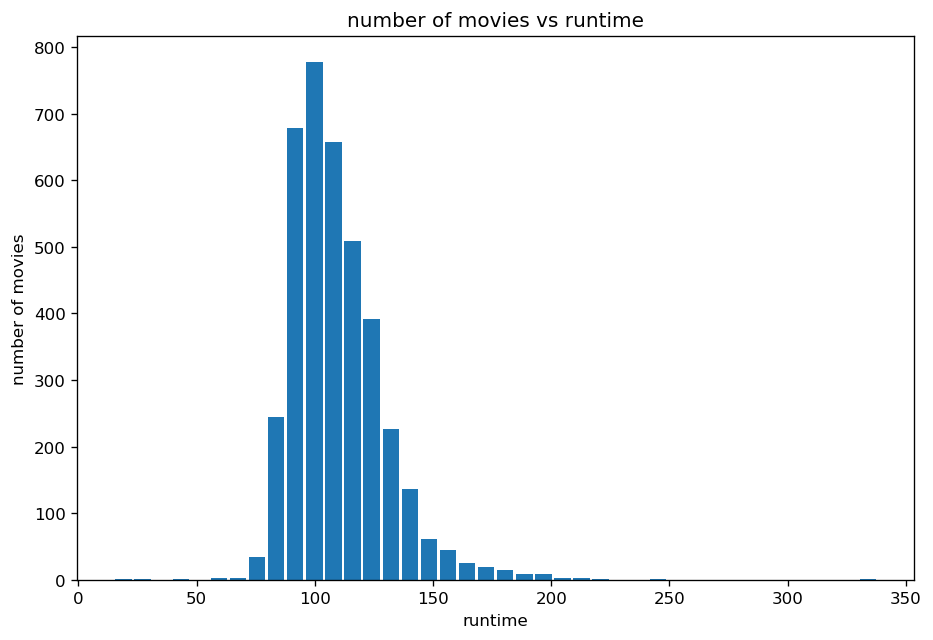

In [18]:
plt.figure(figsize=(9,6),dpi=120) # changing figure size
plt.hist(tmdb_df['runtime'],bins=40,rwidth=0.86) #plotting histogram for givrn bins
plt.xlabel('runtime') #labelling x axis
plt.ylabel('number of movies') #labelling y axis
plt.title('number of movies vs runtime') #giving title

plt.show() #show histogram



### Research Question 5 (Which Year has max movies)

>**Answer : **  
***Year 2011 has highest movies of 199 ***

In [19]:
#grouping tmdb_df with respect to year
df = tmdb_df.groupby('release_year',as_index=True).size() # size of each group
print("{} has max no. of movies {}".format(df.idxmax(),df.max())) # print max value and its index





2011 has max no. of movies 199


### Visualisation of number of movies in a year

>Graphs shows that production of movies increases with years and has 199 number in 2011 

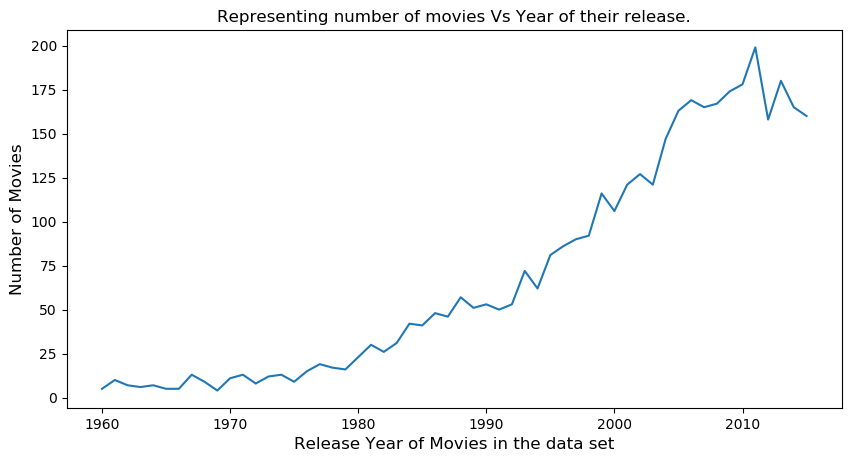

In [20]:
plt.figure(figsize=(10,5), dpi = 100)

#on x-axis
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
#on y-axis
plt.ylabel('Number of Movies', fontsize = 12)
#title of the line plot
plt.title('Representing number of movies Vs Year of their release.')

#plotting the graph
plt.plot(df)

#displaying the line plot
plt.show()


In [21]:
print(df.describe().astype(int)) #number of movies cant be float
print('median  {}'.format(int(df.median()))) 

count     56
mean      68
std       62
min        4
25%       13
50%       49
75%      121
max      199
dtype: int32
median  49


>Distribution is negatively skewed with mean 68 movies and median 49 movies


### Research Question 5 (Profitable Movies with year and which is most profitable year)

>As we can see from the graph that most profitable year is 2015 and our calculation also tells the same

year with max profit is 2015


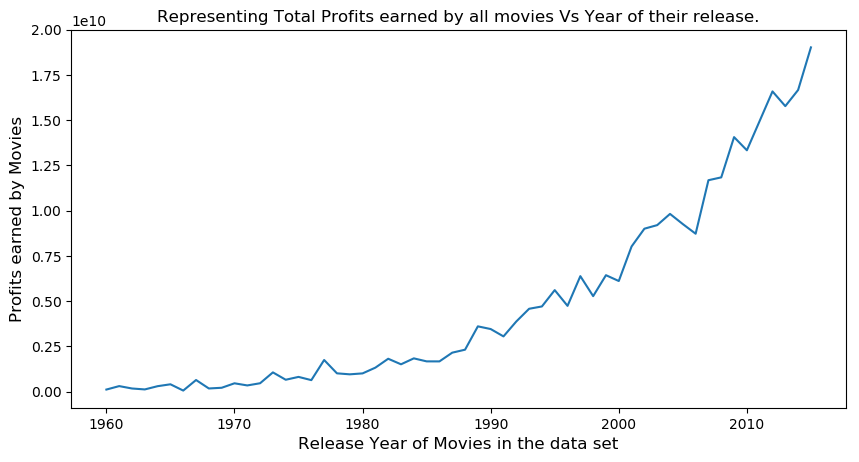

In [22]:
profitable = tmdb_df.groupby('release_year')['profit'].sum()
max_year=profitable.idxmax()
print('year with max profit is {}'.format(max_year))
#We will be using Line plot for this analysis
#Since we want to know the profits of movies for every year therefore we have to sum up all the movies of a particular year

#figure size(width, height)
plt.figure(figsize=(10,5), dpi = 100)

#on x-axis
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
#on y-axis
plt.ylabel('Profits earned by Movies', fontsize = 12)
#title of the line plot
plt.title('Representing Total Profits earned by all movies Vs Year of their release.')

#plotting the graph
plt.plot(profitable)

#displaying the line plot
plt.show()

In [23]:
print(profitable.describe().apply(lambda x: format(x, 'f'))) # we were getting scientific notation so i changed it to float 
print('median  {}'.format(profitable.median()))

count             56.000000
mean      4850735185.321428
std       5294931479.221948
min         52468689.000000
25%        647020179.500000
50%       2230811714.500000
75%       8198108656.000000
max      19032145273.000000
Name: profit, dtype: object
median  2230811714.5


>The distribution is negatively skewed with mean  4850735185.3 dollars and median 2230811714.5 dollars


### Research Question 6 (Director which directs the most)

>**Answer**
Steven Spielberg directed most number of films 27

In [24]:
#grouping tmdb_df with respect to director
director_df=tmdb_df.groupby('director').size() #getting size of each group
direc_max = director_df.idxmax() #index of group having max sixe
print("{} directed most number of films {}".format(direc_max,director_df.max())) #printing max value and index


Steven Spielberg directed most number of films 27



### Research Question 7 (Profitable movies  that are successful)

>Profit earned by movie tells that it is sucessfull or not . But there should be a criterion for it .
So lets consider that movie with  profit more than 65 million dollars should be considered as successfull 
so we have to subpart and again wrangle the data to get our desire set of data to perform further research.


In [25]:
profit_min = 65000000 # assumption for successful movies there profit should be greater than thid

#insert row with bool values True if profit > 65000000
tmdb_df.insert(3,'sucess',tmdb_df['profit']>=profit_min)

# droping those index rows whose bool value of success is False
profit_df= tmdb_df.drop(tmdb_df[tmdb_df['sucess'] == False].index) 

#profit_df contains data for only those whose value of success is True
profit_df.head()


,budget,revenue,profit,sucess,original_title,cast,director,runtime,genres,production_companies,release_date,release_year
0,150000000,1513528810,1363528810,True,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015
1,150000000,378436354,228436354,True,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,2015
2,110000000,295238201,185238201,True,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2015
3,200000000,2068178225,1868178225,True,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,2015
4,190000000,1506249360,1316249360,True,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2015



### Research Question 8 (What are the statistics of runtime of successful Movies)

>Calculation and graphs shows that more successfull movies have mean run time 114.3 minutes and graph is positively  skewed

In [26]:
#statistical description of runtime of successful movies
profit_df['runtime'].describe() 

count    1130.000000
mean      114.324779
std        20.829388
min        69.000000
25%        99.000000
50%       112.000000
75%       126.000000
max       201.000000
Name: runtime, dtype: float64

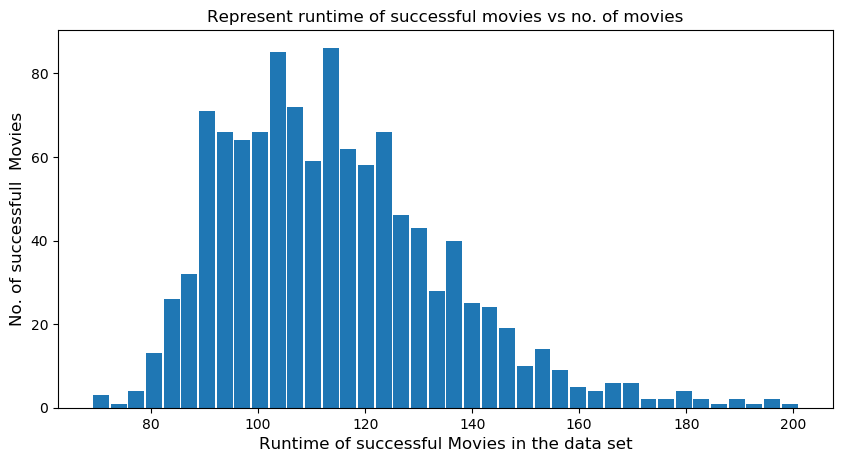

In [27]:
plt.figure(figsize=(10,5), dpi = 100)

#on x-axis
plt.xlabel('Runtime of successful Movies in the data set', fontsize = 12)
#on y-axis
plt.ylabel('No. of successfull  Movies', fontsize = 12)
#title of the line plot
plt.title('Represent runtime of successful movies vs no. of movies')

#plotting the graph
plt.hist(profit_df['runtime'],bins=40, rwidth=0.9)

#displaying the line plot
plt.show()


### Research Question 9 (What are the mean of budget ,revenue and profit of sucessful Movies)

>Calculation shows mean budget of successful

In [28]:
profit_df['budget'].mean() #mean budget

65178466.61238938

In [109]:
profit_df['revenue'].mean() #mean revenue

273392926.46268654

In [108]:
profit_df['profit'].mean() #mean profit

214531157.80597016


### Research Question 10 (Successful movies distribution with year)

>from the calculation n graph most of the successful movies are released in 2014 with 64 successful movies

In [29]:
#grouping profit_df with release year as index
success_df = profit_df.groupby('release_year',as_index=True).size() # size of each group

#print max and max index 
print("{} has max no. of movies {}".format(success_df.idxmax(),success_df.max()))




2014 has max no. of movies 64


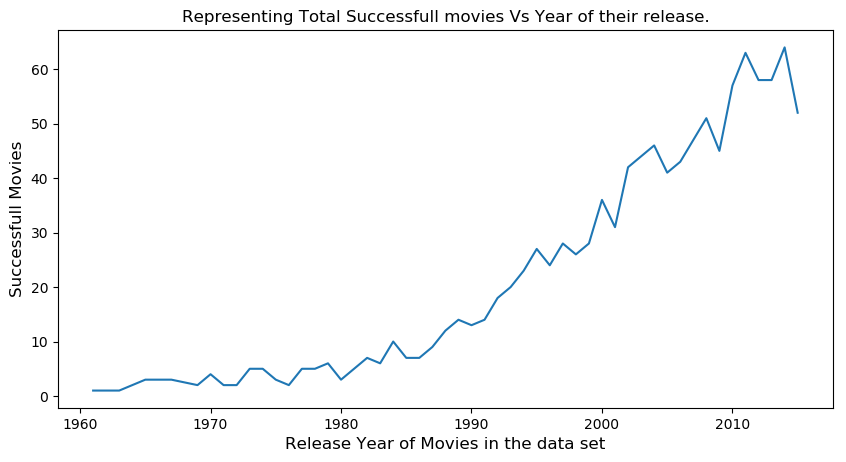

In [30]:
plt.figure(figsize=(10,5), dpi = 100)

#on x-axis
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
#on y-axis
plt.ylabel('Successfull Movies', fontsize = 12)
#title of the line plot
plt.title('Representing Total Successfull movies Vs Year of their release.')

#plotting the graph
plt.plot(success_df)

#displaying the line plot
plt.show()

In [31]:
print(success_df.describe().astype(int)) #as number of movies cant be float
print('median  {}'.format(int(success_df.median())))


count    52
mean     21
std      20
min       1
25%       5
50%      13
75%      41
max      64
dtype: int32
median  13


>From the graph and calculation it is observed that  maximum movies are produced  in 2014
The distribution is negatively skewed with mean  21 movies and median 13


### Research Question 11 (Successful geners)


>from the calculation n graph most successfull genre is comedy and second most successfull is Action

In [32]:
#function which will take any column as argument 
def get_count(column):
    
    #concating values of series in single list and seprating by |
    col_data=profit_df[column].str.cat(sep='|') 
    
    #split values to list
    col_data=pd.Series(col_data.split('|')) 
    
    #counting each value by value
    count = col_data.value_counts() 
    return count

#calling function for genres
count=get_count('genres') 

#previewing top 5 values
count.head() 




Comedy       409
Action       404
Drama        393
Adventure    336
Thriller     335
dtype: int64

## Visualisation of successful genres

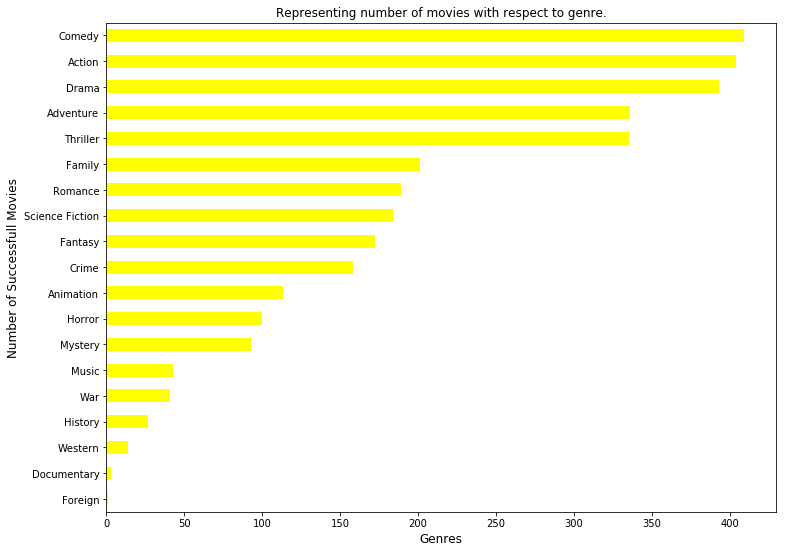

In [91]:
count.sort_values(ascending=True,inplace=True) #sorting in ascending order
plt.xlabel('Genres', fontsize = 12)
#on y-axis
plt.ylabel('Number of Successfull Movies', fontsize = 12)
#title of the line plot
plt.title('Representing number of movies with respect to genre.')

#plotting the graph
count.plot.barh(figsize=(12,9),color='yellow')

#displaying the line plot
plt.show()


## Research Question 12 (Most used Casts)

>Tom cruise is most successfull actor according to our data set . He had acted in 26 movies

In [34]:
#calling function for cast
count_cast=get_count('cast') 

#previewing top 5 values
count_cast.head() #previewing top 5 values


Tom Cruise            26
Tom Hanks             21
Brad Pitt             20
Cameron Diaz          20
Sylvester Stallone    20
dtype: int64

## Research Question 13 (Top 5 Production Company that produces most of the successfull movies)

>Universal Pictures
,Warner Bros.
,Paramount Pictures
,Twentieth Century Fox Film Corporation.
,Columbia Pictures
are top 5 successfull production companies


In [35]:
#concating values of series in single list and seprating by |
col_data=profit_df['production_companies'].str.cat(sep='|') 

#split values to list
col_data=pd.Series(col_data.split('|'))

#count values 
count_pro = col_data.value_counts()

#previewing top 5 vakues
count_pro.head()



Universal Pictures                        133
Warner Bros.                              125
Paramount Pictures                        115
Twentieth Century Fox Film Corporation    109
Columbia Pictures                          80
dtype: int64

## Research Question 14 (Production Company that produces most Profitable Movie)

>Ingenious Film Partners,Twentieth Century Fox Film Corporation,Dune Entertainment,Lightstorm Entertainment produced the most profitable movie avtar

In [36]:
max_index=profit_df['profit'].idxmax() #index of maximum profit
profit_df['production_companies'][max_index] #value of production company at max index


'Ingenious Film Partners|Twentieth Century Fox Film Corporation|Dune Entertainment|Lightstorm Entertainment'

## Research Question 15 (Visualisation of Universal Pictures with its number of movies per year)

>As production_companies are seperated by '|' .so we split data to make a list 
then we change the dtype of production_companies to obj type
so we have to do **data wrangling** here also

In [62]:
profit_df.dropna(subset=['production_companies']) #drop rows which have NaN values for column
profit_df=profit_df.reset_index(drop=True) # reseting index of dataframe


In [38]:
#insert column with bool values as False
profit_df.insert(5,'universal_pictures',False) 

#previewing
profit_df.head()

,budget,revenue,profit,sucess,original_title,universal_pictures,cast,director,runtime,genres,production_companies,release_date,release_year
0,150000000,1513528810,1363528810,True,Jurassic World,False,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015
1,150000000,378436354,228436354,True,Mad Max: Fury Road,False,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,2015
2,110000000,295238201,185238201,True,Insurgent,False,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2015
3,200000000,2068178225,1868178225,True,Star Wars: The Force Awakens,False,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,2015
4,190000000,1506249360,1316249360,True,Furious 7,False,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2015


In [64]:
#spliting values of column
profit_df['production_companies']=profit_df['production_companies'].str.split('|')

#converting split values to str type
profit_df['production_companies']=profit_df['production_companies'].astype(str)

In [61]:
#iterating over production_companies 
for key,row in profit_df['production_companies'].iteritems():
    if 'Universal Pictures'in row: #check Universal Pictures in a row
        profit_df.at['universal_pictures',key]=True #if True changing bool value at index to True


In [47]:
profit_df.head() #previewing

,budget,revenue,profit,sucess,original_title,universal_pictures,cast,director,runtime,genres,production_companies,release_date,release_year
0,150000000,1513528810,1363528810,True,Jurassic World,False,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,"['Universal Studios', 'Amblin Entertainment', ...",2015-06-09,2015
1,150000000,378436354,228436354,True,Mad Max: Fury Road,False,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,"['Village Roadshow Pictures', 'Kennedy Miller ...",2015-05-13,2015
2,110000000,295238201,185238201,True,Insurgent,False,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,"['Summit Entertainment', 'Mandeville Films', '...",2015-03-18,2015
3,200000000,2068178225,1868178225,True,Star Wars: The Force Awakens,False,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,"['Lucasfilm', 'Truenorth Productions', 'Bad Ro...",2015-12-15,2015
4,190000000,1506249360,1316249360,True,Furious 7,True,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,"['Universal Pictures', 'Original Film', 'Media...",2015-04-01,2015


In [51]:
#dropping those rows which have False bool value
profit_df=profit_df.drop(profit_df[profit_df['universal_pictures']==False].index)

#updated data having production company as Universal pictures
profit_df.head()


,budget,revenue,profit,sucess,original_title,universal_pictures,cast,director,runtime,genres,production_companies,release_date,release_year
4,190000000,1506249360,1316249360,True,Furious 7,True,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,"['Universal Pictures', 'Original Film', 'Media...",2015-04-01,2015
8,74000000,1156730962,1082730962,True,Minions,True,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,"['Universal Pictures', 'Illumination Entertain...",2015-06-17,2015
22,68000000,215863606,147863606,True,Ted 2,True,Mark Wahlberg|Seth MacFarlane|Amanda Seyfried|...,Seth MacFarlane,115,Comedy,"['Universal Pictures', 'Media Rights Capital',...",2015-06-25,2015
26,29000000,287506194,258506194,True,Pitch Perfect 2,True,Anna Kendrick|Rebel Wilson|Hailee Steinfeld|Br...,Elizabeth Banks,115,Comedy|Music,"['Universal Pictures', 'Gold Circle Films', 'B...",2015-05-07,2015
30,28000000,201634991,173634991,True,Straight Outta Compton,True,O'Shea Jackson Jr.|Corey Hawkins|Jason Mitchel...,F. Gary Gray,147,Drama|Music,"['New Line Cinema', 'Universal Pictures', 'Leg...",2015-08-13,2015


In [110]:
#grouping updated data by release year
#getting size of each group
release_data = profit_df.groupby('release_year',as_index=True).size()


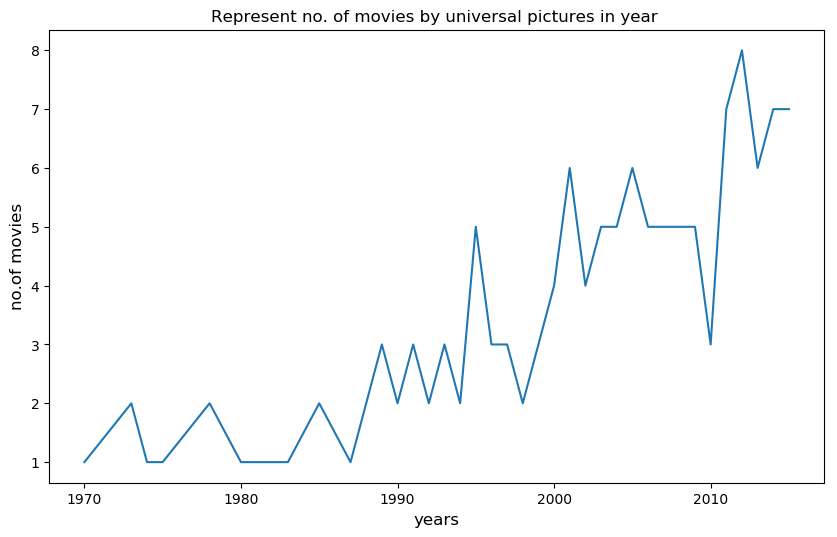

In [74]:

plt.figure(figsize=(10,6), dpi=100) # changing figure size
plt.title('Represent no. of movies by universal pictures in year ') #title of graph
plt.xlabel('years',size=12) # x label
plt.ylabel('no.of movies',size=12) # y label
plt.plot(release_data) #plot graph on release_data

plt.show() #show graph

In [75]:
print(release_data.describe().astype(int)) #as number of movies cant be float
print('median  {}'.format(int(release_data.median())))

count    38
mean      3
std       2
min       1
25%       2
50%       3
75%       5
max       8
dtype: int32
median  3


0>From the graph and calculation it is observed that Universal Pictures collaboratly Produces maximum movies in 2014
The distribution is negatively skewed with mean  3 movies and median 3

## Research Problem 16 (What are the movie genres used by Universal Pictures)

> Top 5 genres used by Universal Pictures are **Comedy, Action, Thriller, Drama,Adventure**

In [79]:
#function which will take any column as argument 
def get_new_count(column):
    prod_data = profit_df[column].str.cat(sep='|') #concat data of each row seprated by |
    prod_data=pd.Series(prod_data.split('|')) #split data
    count_data = prod_data.value_counts() #counts each value
    return count_data

new_count = get_new_count('genres') # # get counts by value by calling function
new_count.head() 

Comedy       54
Action       48
Drama        47
Thriller     39
Adventure    28
dtype: int64

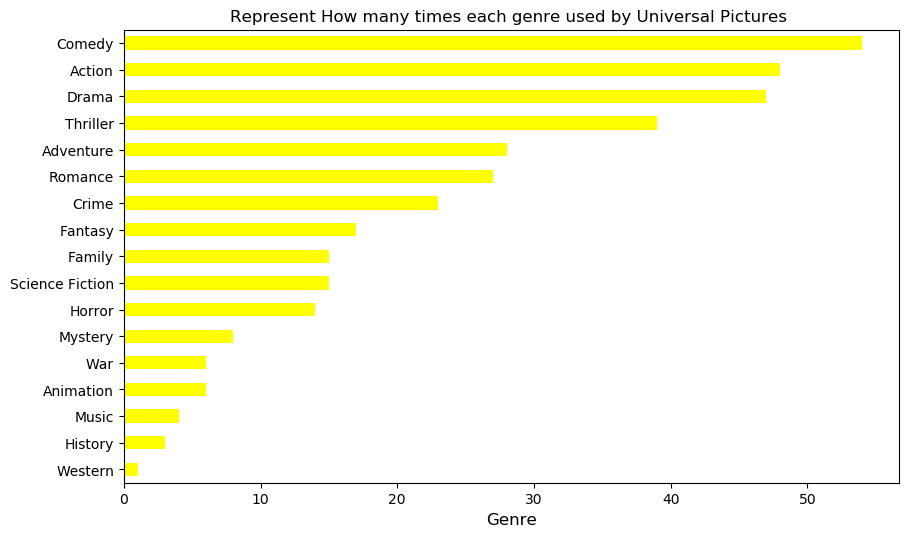

In [111]:
new_count.sort_values(ascending=True,inplace=True) #soring new_count in ascending 

plt.figure(figsize=(10,6),dpi=100) # change fig size

plt.title('Represent How many times each genre used by Universal Pictures ') #title

plt.xlabel('No. of times genre used',size=12) #x label

plt.xlabel('Genre',size=12) #y label

new_count.plot.barh(color='yellow') #plot horizontal bar graph for each new_count value
#displaying the line plot
plt.show()

## Research Problem 17 (Top 5 Casts mostly used by Universal Pictures)

> Top 5 casts used by Universal Pictures are **Paul Walker, Vin Diesel,Russell Crowe,Ben Stiller, Robert De Niro**



In [115]:
count_new_cast = get_new_count('cast') # get counts by value
count_new_cast.head() #top 5 values

Paul Walker       6
Vin Diesel        5
Russell Crowe     5
Ben Stiller       5
Robert De Niro    5
dtype: int64

<a id='conclusions'></a>
## Conclusions
 
>Tmdb data set is a very interesting data set. Analysing this give me insight about Data Analysis.
    After analysing data set I come to know about many amazing facts about movies
            
            1. Most profitable movie is Avtar.
            2. Avg runtime of most movies is 109 min
            3. Movies production is increasing every year 2015 has 199 movies
            4. Steven Spielberg directed most of the movies
            
>I have done analysis for successful movies . If a movie may follow following criterion then it may get success
    
           1. Avg runtime should be 114 min
           2. Avg budget should be 65 million Us dollars
           3. Genres of the movie should be comedy, Action, Drama,Thriller, Adventure
           4. Cast used should be Tom Cruise,Tom Hanks,Brad Pitt,Cameron Diaz,Sylvester Stallone  
           5. Production company can be any one if it follows above 
              but top 5 most successfull companies that produced most of movies 
              are Universal Pictures, Warnes Bros.,Paramount Pictures,Twentieth Century Fox Film
              Corporation, Columbia Pictures
>Moreover Avtar is also produced by Twentieth Century Fox Film Corporation with collaboration of other small companies 

**Note: Above criterion doesnt gurantee Success , As correlation doesnt mean Causation . Success of movies depends on other conditions also which can affect the success of movies .**


>Analysis of Universal Pictures
        
      1. Most movies are produced in 2014
      2. Genres of its movies are comedy, Action, Drama,Thriller, Adventure
      3. Most frequent casts are Paul Walker,Vin Diesel,Russell Crowe,Ben Stiller,Robert De Niro    

>As a tribute to paul walker , from this research come to know that Fast and Furious Series produced by Universal Pictures as both Paul Walker and Vin Diesel are in fast and furious

**Problem in this analysis**
> As currency of budget revenue is not given we have to assume it to dollars. There can be possiblities that for some movies currency will be Dinar,inr,euro etc. So it will affect the analysis beacuse it can be biased to some movies
Moreover, there is no budget and revnue data available for some movies. There can be possiblity that they may be most or least profitable movie.
So this data analysis is some what biased and faulty.Also data may be incomplete or incorrect and it is not upto date

>Also we assume our own that for successful movies there profit must be more than 65 million.But other person can assume it should be above 40 million dollar. Each one has different perpective.

